In [1]:
package systemStructure {

  part def HighAltitudePlatformSystem {
    part payload{
        
        part  EarthObservationSubsystem {}
        part  EnvironmentMonitoringSubsystem {}
        part  SurveillanceSubsystem {}
        part  TrackingSubsystem {}
        part  DisasterMonitoringSubsystem {}
        part  AirQualitySubsystem {}
             
    }

 part structure {
        part  SolarPowerSubsystem {}
        part  EnergyStorageSubsystem {}
        part  FlightControlSubsystem {}
        part  ThermalManagementSubsystem {}
        part  StructuralSubsystem {}
        part  propulsionsystem {}
     }
}
}


Package systemStructure (630927ef-ea1f-49ff-847d-e131b40f7e0b)


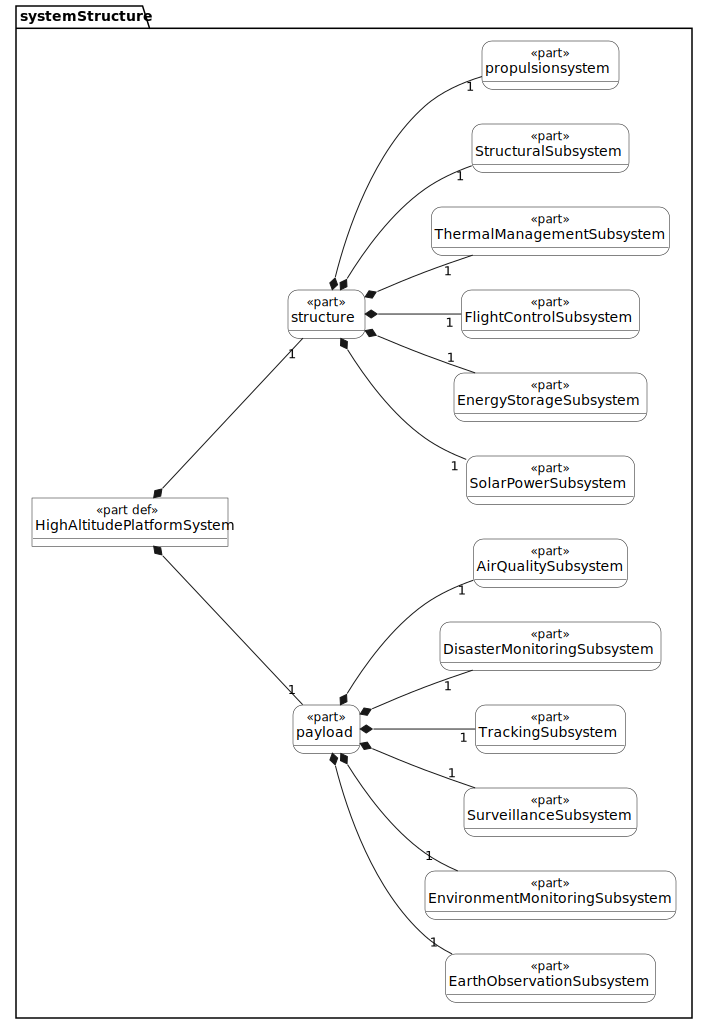

In [4]:
%viz --style LR systemStructure

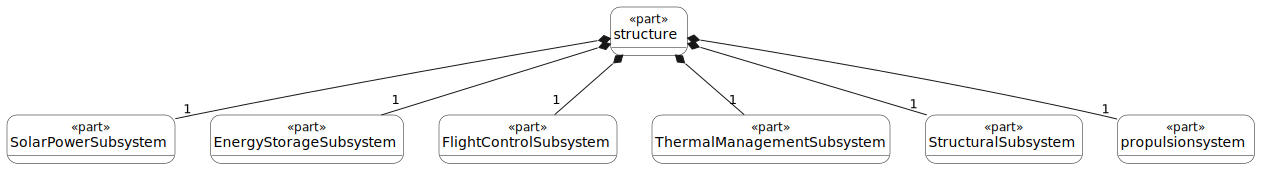

In [20]:
%viz  systemStructure::HighAltitudePlatformSystem::structure


In [2]:
package VsystemStructure {
  
    
    part def Sensors{
      
    }
    part def Camera{
      
    }
    part def HighAltitudePlatform;
    part sensors : Sensors[1..*];
    part camera : Camera[2];
    
        
    // Define the PayloadChoices variation
    variation part def PayloadChoices {
        variant camera;
        variant sensors;
    }
    abstract part HAP : HighAltitudePlatform {
        
       part EarthObservationSubsystem: PayloadChoices[1];
       part EnvironmentMonitoringSubsystem: PayloadChoices[1];
       
           
        // Constraints 
         assert constraint {
            (EarthObservationSubsystem == PayloadChoices::sensors) xor
            (EarthObservationSubsystem == PayloadChoices::camera)
        }

        assert constraint {
            (EnvironmentMonitoringSubsystem == PayloadChoices::sensors) xor
            (EnvironmentMonitoringSubsystem == PayloadChoices::camera)
        }
      }


   
}

Package VsystemStructure (55d23e67-4030-4a54-a804-35c2533affa0)


In [3]:
package 'VariationConfiguration' {
    import 'VsystemStructure'::*;

     // Example configurations 
    part SubSystemWithCamera :> HAP {
        part redefines EarthObservationSubsystem = PayloadChoices::camera;
         part redefines EnvironmentMonitoringSubsystem = PayloadChoices::camera;
    }

    part SubSystemWithSensors :> HAP {
        part redefines EarthObservationSubsystem = PayloadChoices::sensors;
        part redefines EnvironmentMonitoringSubsystem = PayloadChoices::sensors;
    }
}

Package VariationConfiguration (e120e463-bb37-4e93-a1f3-99982efb71e3)


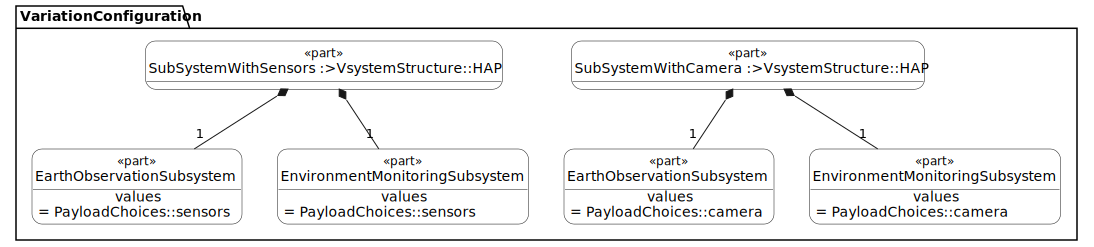

In [4]:
%viz VariationConfiguration
